We will use Naive Bayes to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

In [2]:
pdata=pd.read_csv('csvfiles/pima-indians-diabetes.csv')
pdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pdata.shape     #check no of column and row in dataframe

(768, 9)

In [4]:
pdata.isnull().values.any()     #if there are any null values in data set

False

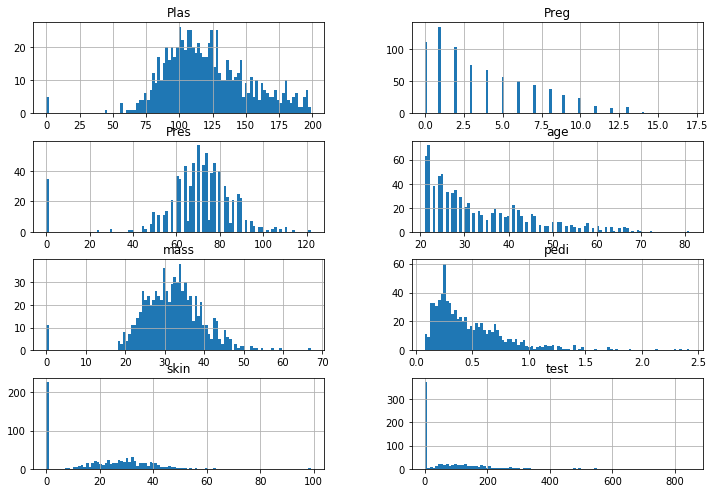

In [5]:
columns=list(pdata)[0:-1]      #excluding outcome column which has only
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));    #histogram of first 8 column

In [6]:
pdata.corr()        #it will show correlation matrix

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df,size=11):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

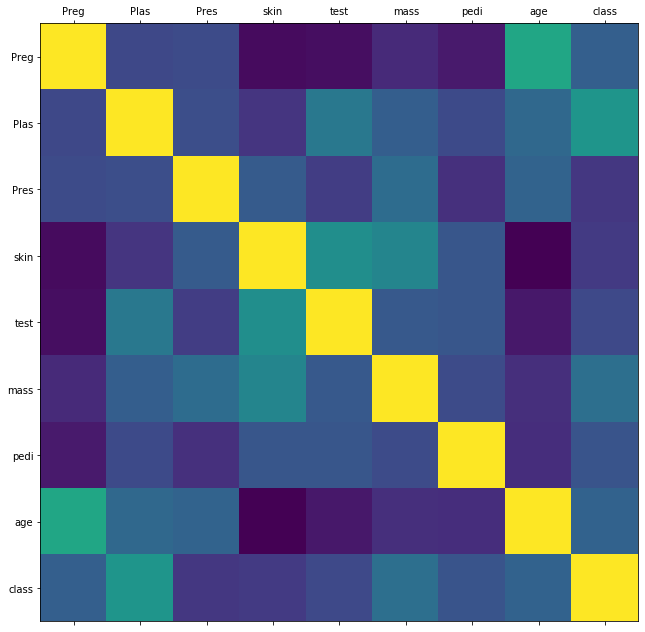

In [8]:
plot_corr(pdata)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see none of variable have correlation with any other variables. 

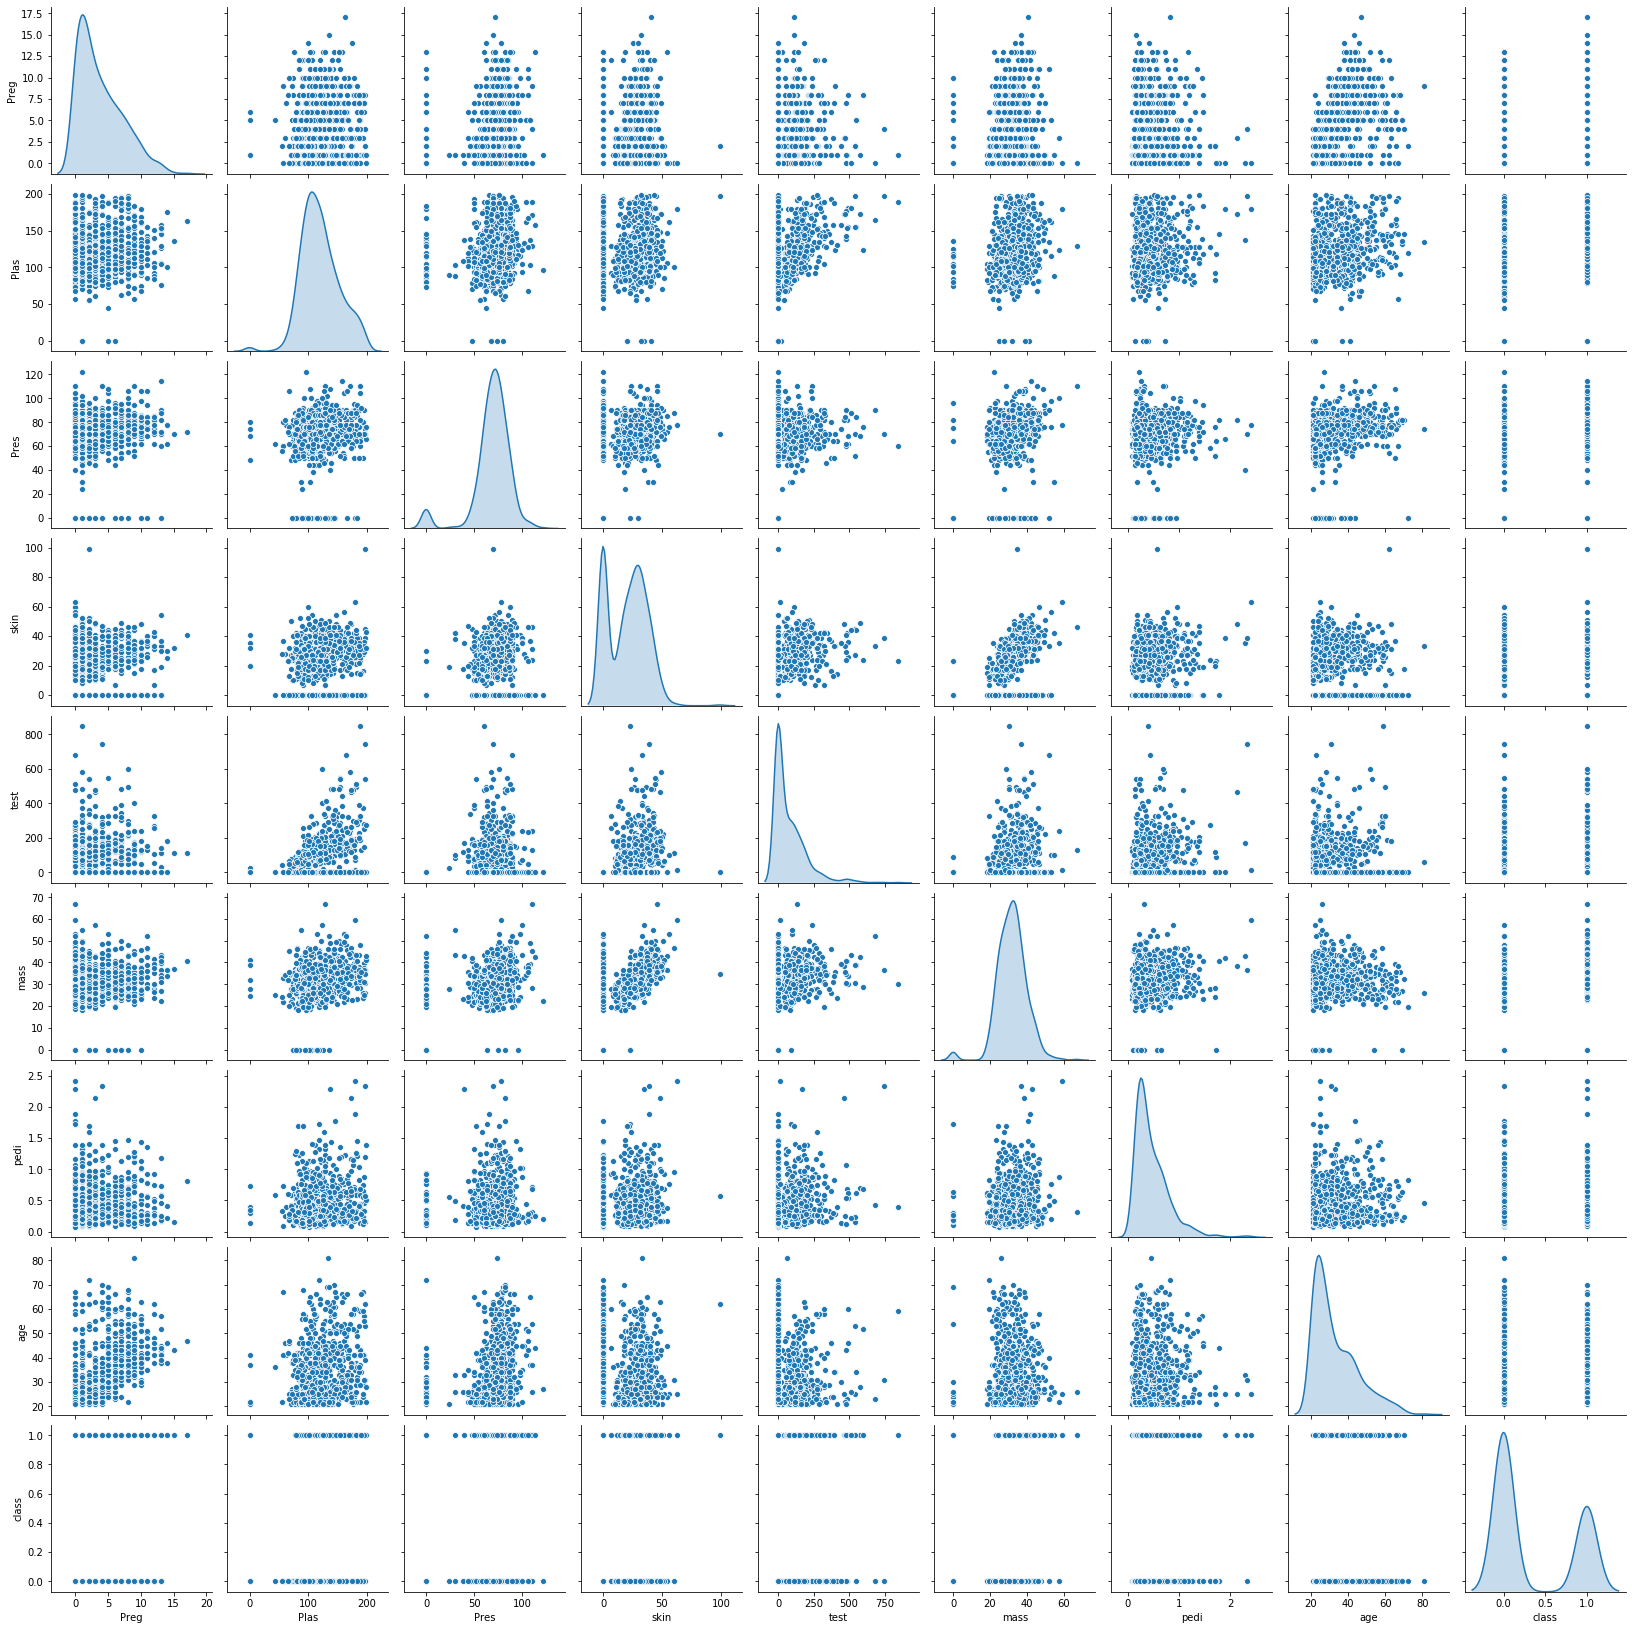

In [9]:
sns.pairplot(pdata,diag_kind='kde');

In [10]:
#calculate diabetes ratio of True/False from outcome variable

n_true=len(pdata.loc[pdata['class'] == True])
n_false=len(pdata.loc[pdata['class'] == False])
print("number of true cases : {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100))
print("number of false cases : {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

number of true cases : 268 (34.90%)
number of false cases : 500 (65.10%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes.

Its a good distribution True/False cases of diabetes in data.

In [11]:
#Spliting the data
#We will use 70% of data for training and 30% for testing.

from sklearn.model_selection import train_test_split
x=pdata.drop('class' , axis=1)          #predictor feature column ( 8 x m )
y=pdata['class']     #predicted class ( 1=True, 0=False ) ( 1 x m )

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

train_x.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


Lets check split data

In [12]:
print("{0:0.2f}% data is in training set".format((len(train_x)/len(pdata.index))*100))
print("{0:0.2f}% data is in testing set".format((len(test_x)/len(pdata.index))*100))

69.92% data is in training set
30.08% data is in testing set


Now lets check diabetes True/False ratio in split data

In [13]:
print("Original Diabetes True Values : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class']==1]), (len(pdata.loc[pdata['class']==1])/len(pdata.index))*100))
print("Original Diabetes False Values : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class']==0]), (len(pdata.loc[pdata['class']==0])/len(pdata.index))*100))
print(" ")
print("Training Diabetes True Values : {0} ({1:0.2f}%)".format(len(train_y[train_y[:]==1]), (len(train_y[train_y[:]==1])/len(train_y))*100))
print("Training Diabetes False Values : {0} ({1:0.2f}%)".format(len(train_y[train_y[:]==0]), (len(train_y[train_y[:]==0])/len(train_y))*100))
print(" ")
print("Test Diabetes True Values : {0} ({1:0.2f}%)".format(len(test_y[test_y[:]==1]), (len(test_y[test_y[:]==1])/len(test_y))*100))
print("Test Diabetes False Values : {0} ({1:0.2f}%)".format(len(test_y[test_y[:]==0]), (len(test_y[test_y[:]==0])/len(test_y))*100))

Original Diabetes True Values : 268 (34.90%)
Original Diabetes False Values : 500 (65.10%)
 
Training Diabetes True Values : 183 (34.08%)
Training Diabetes False Values : 354 (65.92%)
 
Test Diabetes True Values : 85 (36.80%)
Test Diabetes False Values : 146 (63.20%)


As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [14]:
pdata.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We can see lots of 0 entries above.
Replace 0s with serial mean

In [15]:
from sklearn.impute import SimpleImputer

rep_0 = SimpleImputer(missing_values=0, strategy='mean')
cols = train_x.columns
train_x = pd.DataFrame(rep_0.fit_transform(train_x))
test_x = pd.DataFrame(rep_0.fit_transform(test_x))

train_x.columns = cols
test_x.columns=cols

train_x.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [21]:
#logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
pred_y=model.predict(test_x)

In [23]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

         0         1         2        3         4         5         6  \
0  0.12446  0.026332 -0.029373 -0.01231 -0.000083  0.074114  0.347578   

          7  intercept  
0  0.012705  -4.983957  


In [24]:
model_score = model.score(test_x, test_y)
model_score

0.7792207792207793

In [25]:
cm=metrics.confusion_matrix(test_y,pred_y, labels=[1,0])
cm

array([[ 48,  37],
       [ 14, 132]], dtype=int64)

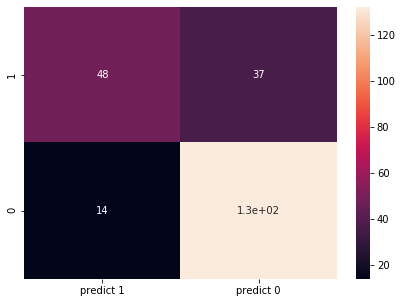

In [26]:
df_cm=pd.DataFrame(cm, index = [i for i in ['1','0']],columns= [i for i in ['predict 1','predict 0']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error